## Build a Linear Regression Model usinf  `statsmodel`

### Step 1: Reading and Understandin the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Figure size 432x288 with 0 Axes>

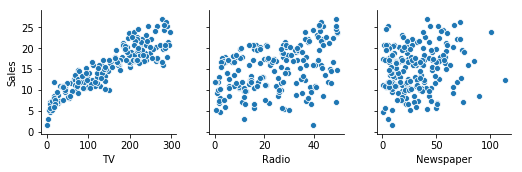

In [3]:
plt.figure()
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

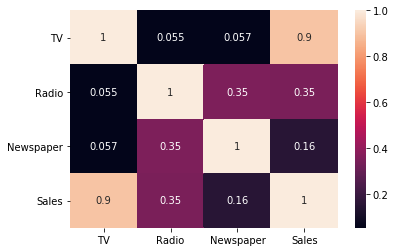

In [4]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

In [5]:
X= np.array(advertising['TV'])
y= np.array(advertising['Sales'])

In [15]:
# split train and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state =100)
X_train_sm = sm.add_constant(X_train)

In [17]:
lm = sm.OLS(y_train,X_train_sm).fit()
lm.params

array([6.9486832 , 0.05454575])

In [18]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.52e-52
Time:                        12:51:07   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

## residual Analysis

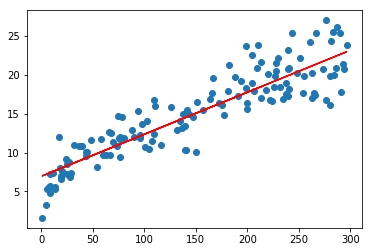

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [27]:
y_train_pred = lm.predict(X_train_sm)
res = (y_train - y_train_pred)

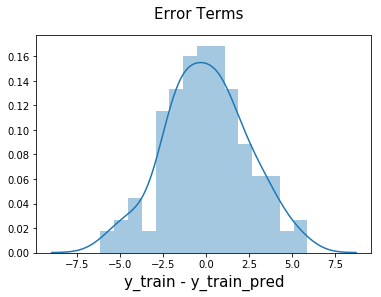

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

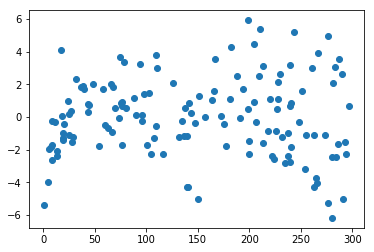

In [29]:
plt.scatter(X_train,res)
plt.show()

## Prediction on the test set

In [30]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_sm)

In [31]:
from sklearn.metrics import r2_score

In [33]:
print(r2_score(y_test,y_test_pred))

0.7921031601245657
